# Medical Cost Prediction

project overview: To build a linear regression model to understand and identify the patterns of costing based on number of childrens and smoking habits.

----

## <div style="background-color:#E7FFCE; font-size: 25px; color:#253e23"><b>Data Loading</b></div>

In [51]:
#necessary libraries for the linear regression model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

In [5]:
#reading the necessary csv file
med_exp_df = pd.read_csv("Medical_cost_histories.csv")
med_exp_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## <div style="background-color:#E7FFCE; font-size: 25px; color:#253e23"><b>Data Cleaning and Preprocessing</b></div>

In [6]:
#to check the dimension of the imported dataset
med_exp_df.shape

(1338, 7)

The dataset is of 2-dimensional array with over 1338 rows and 7 columns.

In [7]:
#to check the information
med_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dtypes of all the respective columns are valid which includes integer, string and float.

### Missing Values Check

In [54]:
#checking if any missing values exists 
med_exp_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Since the sum for all columns are zero (0), there are no missing values.

### Cardinality Check

In [55]:
#to check the proportional distribution of unique values in columns out of totals
med_exp_df.nunique()/med_exp_df.shape[0]*100

age          3.512706
sex          0.149477
bmi         40.956652
children     0.448430
smoker       0.149477
region       0.298954
charges     99.925262
dtype: float64

values > 50% which means none have more than influence of 50% so there is no high cardinality in the dataset.

### Multicollinearity Check

In [57]:
#to check the correlations of numeric columns only 
numeric_med_cols = med_exp_df.select_dtypes(include='number') 
numeric_med_cols.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


All the columns have 0.04 to 0.2 values which indicates low positive correlation with each other. Since they are not highly related to each other we do no remove the multicollinearity.

## <div style="background-color:#E7FFCE; font-size: 25px; color:#253e23"><b>Statistical Analysis</b></div>

In [59]:
#describing the overall important statistics
med_exp_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## <div style="background-color:#E7FFCE; font-size: 25px; color:#253e23"><b>Data Exploratory Analysis</b></div>

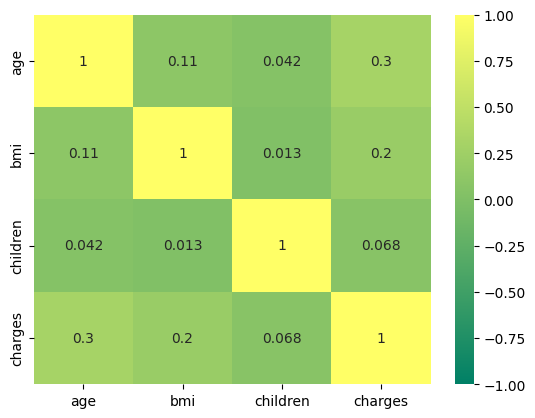

In [60]:
#heatmap to visually showcase the relations
sns.heatmap(numeric_med_cols.corr(),cmap='summer', annot=True, vmin=-1, vmax=1);

### Outlier Check

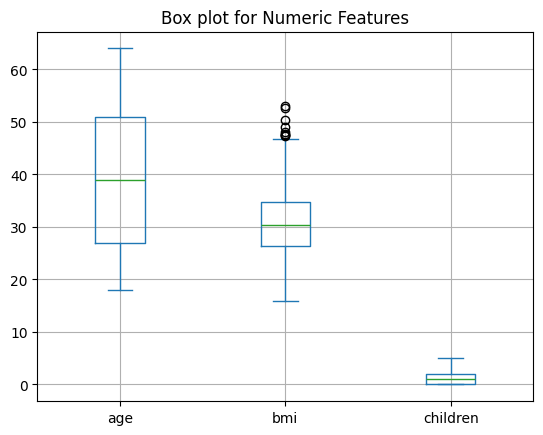

In [61]:
#to check the outliers 
numeric_med_cols.drop(columns=['charges']).plot(kind='box', grid=True, title="Box plot for Numeric Features");

The bmi column shows some upper outliers 

In [62]:
#to check unique values of bmi column
numeric_med_cols['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [65]:
#to find the lower quartile and upper quantile of bmi column
q1 = numeric_med_cols['bmi'].quantile(0.25)
q3 = numeric_med_cols['bmi'].quantile(0.75)

In [66]:
#the identified quantiles
q1,q3

(np.float64(26.29625), np.float64(34.69375))

In [67]:
#inter quartile range 
IQR = q3 - q1

In [68]:
IQR

np.float64(8.3975)

In [69]:
#lower and upper limit through quantiles and inter quartile range
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR
lower_limit, upper_limit

(np.float64(13.7), np.float64(47.290000000000006))

In [70]:
#only taking the rows which means the limits 
numeric_med_cols[(numeric_med_cols['bmi']>lower_limit) | (numeric_med_cols['bmi']<upper_limit)]

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


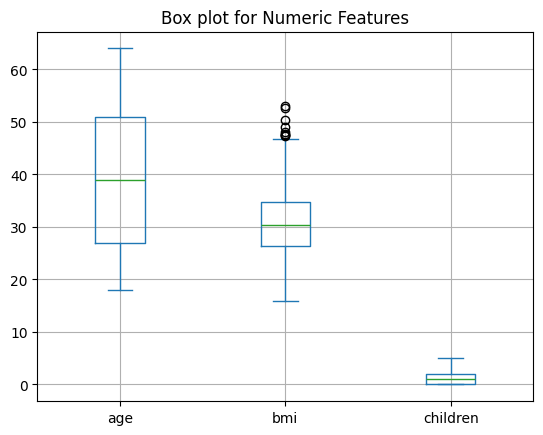

In [71]:
#to visualize the changes 
numeric_med_cols.drop(columns=['charges']).plot(kind='box', grid=True, title="Box plot for Numeric Features");

The rows are 1338 same as before and the outliers have not been removed from the dataset which means that the outliers meet the requirement and they are as much important.

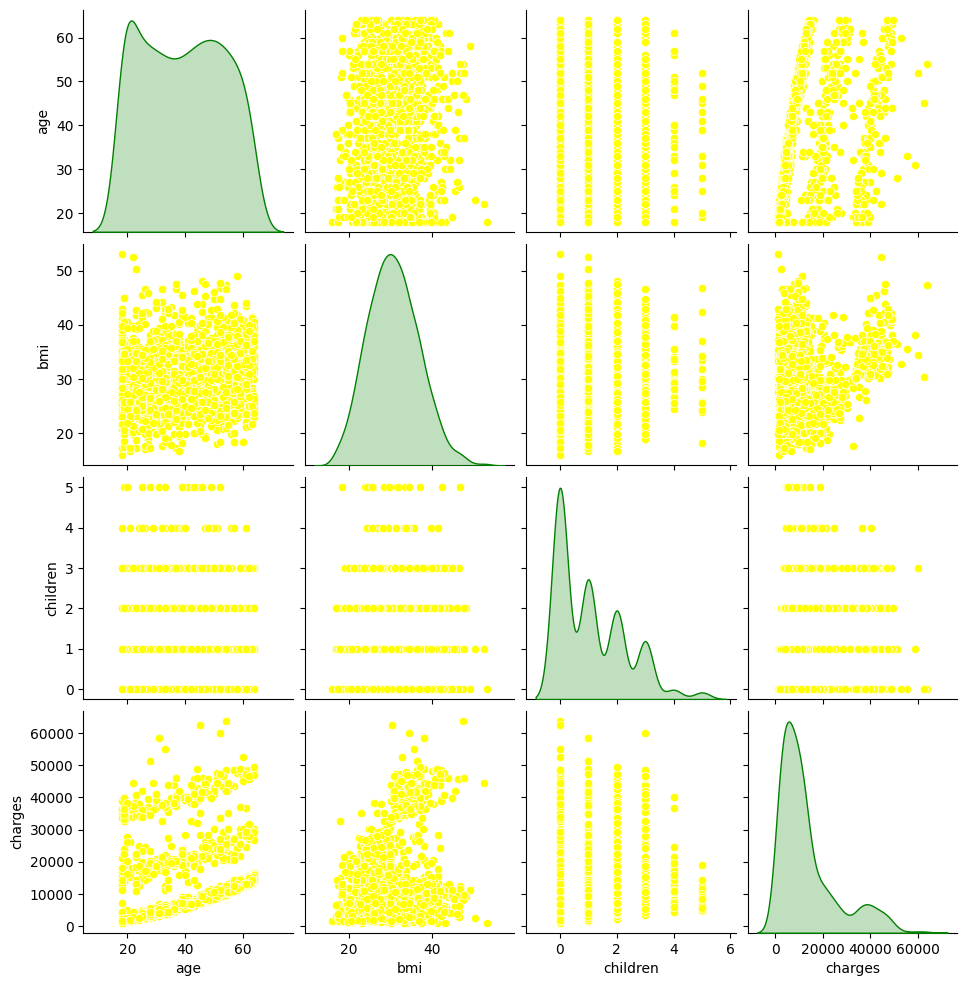

In [72]:
#to visually show all the correlations with kdes for normality
sns.pairplot(numeric_med_cols, diag_kind='kde', plot_kws={'color': 'yellow'}, diag_kws={'color': 'green'});

## <div style="background-color:#E7FFCE; font-size: 25px; color:#253e23"><b>Model Build</b></div>

In [73]:
#initalizing the features and target variables for models
features = med_exp_df.drop(columns=['charges'],axis=1)
target = med_exp_df['charges']

In [74]:
features

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [75]:
target

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [76]:
#initializing one hot encoder for catgeorical columns
ohe = OneHotEncoder(sparse_output=False)
#initializing standard scaler for numerical columns
scaleStandard = StandardScaler()

In [77]:
#making a pipeline for nominal category
nominal_category = Pipeline([
    ('onehotencoder',ohe)
])

In [78]:
#making a pipeline for numerical category
numeric_category = Pipeline([
    ('scalestandard',scaleStandard)
])

In [79]:
#a preprocessing column transformer for mixed features
ct = make_column_transformer(
    (numeric_category,['age','bmi','children']),
    (nominal_category,['sex','region','smoker']),
    remainder='passthrough'
)

In [83]:
#output the format 
ct.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('scalestandard',
                                                  StandardScaler())]),
                                 ['age', 'bmi', 'children']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['sex', 'region', 'smoker'])])

In [84]:
#splitting the test and train data in ratio 80-20
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [85]:
#making a pipeline with model for initializing the preprocessor and algorithm
model = make_pipeline(
    ct,
    LinearRegression()
).fit(X_train,y_train)

In [86]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('scalestandard',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  ['sex', 'region',
                                                   'smoker'])])),
                ('linearregression', LinearRegression())])

## <div style="background-color:#E7FFCE; font-size: 25px; color:#253e23"><b>Model Evaluate</b></div>

In [87]:
#making the model prediction on testing data
y_pred = model.predict(X_test)

In [88]:
#a loss function evaluation 
mae = mean_absolute_error(y_test,y_pred)

In [89]:
mae

4181.1944737536505

On an average, the error is shown to be approximately 4181 thousand when making a prediction

In [91]:
#evaluating the coefficient and interception of the model 
print(f'Coefficients: {model.named_steps['linearregression'].coef_}')
print(f'Intercepts: {model.named_steps['linearregression'].intercept_}')

Coefficients: [ 3.61497541e+03  2.03622812e+03  5.16890247e+02  9.29584582e+00
 -9.29584582e+00  4.59585244e+02  8.89079180e+01 -1.98279052e+02
 -3.50214110e+02 -1.18255644e+04  1.18255644e+04]
Intercepts: 20311.92813931927


In [92]:
#the r2 score of the model
print(f'R2_Score: {r2_score(y_test,y_pred)}')

R2_Score: 0.7835929767120723


The r2 score as 0.78 means the model making the correct prediction is 78%. Out of 100 times the model predicts correctly 78 times.

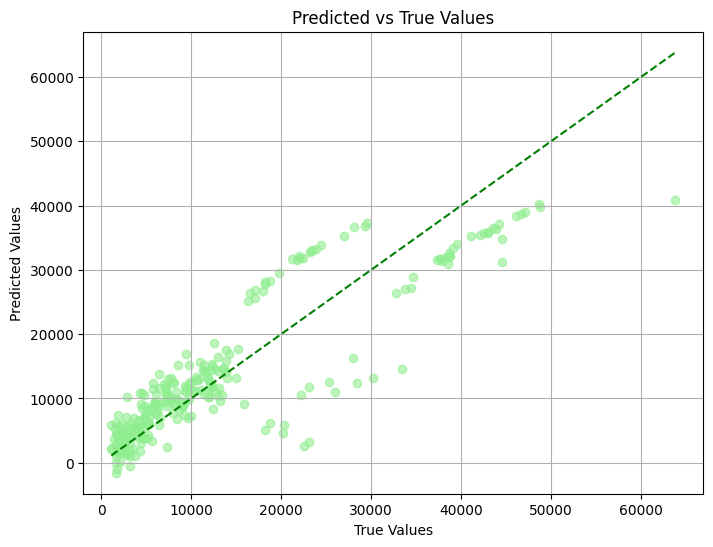

In [93]:
#to show visually the predicted values and the times a true value is equal to predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='lightgreen')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values')
plt.grid(True)
plt.show()


## <div style="background-color:#E7FFCE; font-size: 25px; color:#253e23"><b>Model Save</b></div>

In [95]:
joblib.dump(model, 'medical_model_joblib')

['medical_model_joblib']

----

----